# Read dataset

In [7]:
import pandas as pd
import numpy as np
from ml_functions import *

df = pd.read_csv('toy_dataset.csv', index_col=0)
df.shape

(4046, 25)

In [8]:
df[['rxn_a','rxn_b','rxn_c']] = df['id'].str.split(',', expand=True)

In [9]:
def count_deletions(x):

    return len(x.split(','))

no_delitions = []
for row in range(len(df)):

    num = count_deletions(df['id'].iloc[row])
    no_delitions.append(num)

df['no_deletions'] = no_delitions
df.head()

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,...,OutputX,OutputN,id,growth,strain,optimal,rxn_a,rxn_b,rxn_c,no_deletions
0,0.0,0.1,-0.1,-0.2,1.2,1.0,1.0,1.0,1.0,-6.938894e-17,...,3.0,1.0,r1,3.0,1,0,r1,None,None,1
1,1.0,0.0,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r3,9.0,1,1,r3,None,None,1
2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r2,9.0,1,1,r2,None,None,1
3,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r4,9.0,1,1,r4,None,None,1
4,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r5,9.0,1,0,r5,None,None,1


### Store reactions names

In [10]:
# Store all reactions names
gem_rxn = df[df['no_deletions'] == 1]['id'].unique()

## Find and Delete Duplicated Rows 

In [11]:
index_a = df[df['rxn_a'] == df['rxn_b']].index
df.drop(index_a, axis=0, inplace=True)

index_b = df[df['rxn_a'] == df['rxn_c']].index
df.drop(index_b, axis=0, inplace=True)

index_c = df[df['rxn_b'] == df['rxn_c']].index
df.drop(index_c, axis=0, inplace=True)

df.shape

(3122, 29)

# Study dataset

In [12]:
df['optimal'].value_counts()

0    2268
1     854
Name: optimal, dtype: int64

**Imbalanced** dataset. 

More _infeasible_ that _optimal_ rows.

In [13]:
pd.DataFrame(df[['growth', 'OutputX']].describe()).T

,count,mean,std,min,25%,50%,75%,max
growth,3122.0,5.285698,3.824246,-3.0,2.0,6.0,9.0,12.0
OutputX,3122.0,5.285698,3.824246,-3.0,2.0,6.0,9.0,12.0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
r1,3122.0,0.864190,0.342642,-1.480297e-16,1.000000e+00,1.000000,1.000000e+00,1.0
r3,3122.0,0.519763,0.476272,-1.000000e+00,1.000000e-01,0.333333,1.000000e+00,2.0
r2,3122.0,0.070372,0.615601,-4.000000e+00,-7.771561e-16,0.000000,4.440892e-16,2.0
r4,3122.0,0.140743,1.231201,-8.000000e+00,-1.915135e-15,0.000000,0.000000e+00,4.0
r5,3122.0,1.621156,1.153372,-1.000000e+00,6.666667e-01,1.833333,2.200000e+00,8.0
r6,3122.0,1.761899,1.274749,-1.000000e+00,6.666667e-01,2.000000,3.000000e+00,4.0
r7,3122.0,1.761899,1.274749,-1.000000e+00,6.666667e-01,2.000000,3.000000e+00,4.0
r8,3122.0,1.637060,1.485800,-1.000000e+00,0.000000e+00,2.000000,3.000000e+00,4.0
r9,3122.0,0.432415,0.495491,-4.440892e-16,0.000000e+00,0.000000,1.000000e+00,1.0
r10,3122.0,0.274055,0.681918,-1.000000e+00,-3.289550e-18,0.000000,6.666667e-01,4.0


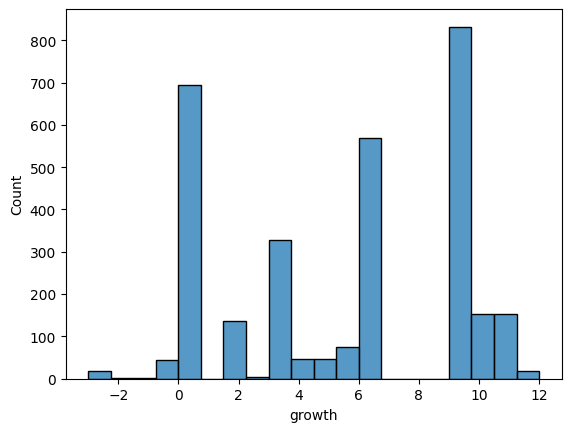

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="growth", bins=20)
plt.show()

## Negative growth

In [16]:
len(df[df['growth'] < 0])

114

114 rows of __negative__ growth

# Some statistical study ideas

In [17]:
print('Infeasible', round(df['optimal'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Optimal', round(df['optimal'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Infeasible 72.65 % of the dataset
Optimal 27.35 % of the dataset


In [18]:
df_inf = df[df['optimal'] == 0]
df_inf.head()

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,...,OutputX,OutputN,id,growth,strain,optimal,rxn_a,rxn_b,rxn_c,no_deletions
0,0.0,0.1,-0.1,-0.2,1.2,1.0,1.0,1.0,1.0,-6.938894e-17,...,3.0,1.0,r1,3.0,1,0,r1,None,None,1
4,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r5,9.0,1,0,r5,None,None,1
5,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r6,9.0,1,0,r6,None,None,1
6,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r7,9.0,1,0,r7,None,None,1
7,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r8,9.0,1,0,r8,None,None,1


Οι αντιδράσεις που φαίνονται στο επόμενο κελί __ΔΕΝ__ οδήγησαν __ποτέ__ σε _infeasible_ status όταν κόπηκαν.

Μια λογική είναι να κοπούν οι παρακάτω αντιδράσεις. Εξαίρεση, οι αντιδράσεις που αφορούν input/output.

In [19]:
set(df_inf[df_inf['no_deletions']==1]['id'].unique()) ^ set(gem_rxn)

{'InputA', 'InputI', 'OutputN', 'r10', 'r14', 'r15', 'r2', 'r3', 'r4'}

#### Check Linear Correlations

##### Point Biserial Correlation

In [20]:
pearsons = df.corr()['optimal'].sort_values(ascending=False)
spearman = df.corr(method='spearman')['optimal'].sort_values(ascending=False)

corr_matrix = pd.DataFrame({'pearsons':pearsons, 'spearman':spearman})
corr_matrix.sort_values(by='pearsons')

/tmp/ipykernel_7384/1351887281.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearsons = df.corr()['optimal'].sort_values(ascending=False)
/tmp/ipykernel_7384/1351887281.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman = df.corr(method='spearman')['optimal'].sort_values(ascending=False)


,pearsons,spearman
InputI,-0.431174,-0.431174
r9,-0.431174,-0.407546
r6,-0.303207,-0.318241
r7,-0.303207,-0.318126
OutputX,-0.303207,-0.326152
growth,-0.303207,-0.326152
r8,-0.253472,-0.277258
r2,-0.230014,-0.251207
r4,-0.230014,-0.246808
r11,-0.229237,-0.278900


# AI / ML Ideas

## Create _training_ and _test_ sets and _data normalization_

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
df.columns

Index(['r1', 'r3', 'r2', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11',
       'r12', 'r13', 'outputK', 'r14', 'r15', 'r16', 'InputA', 'InputI',
       'OutputX', 'OutputN', 'id', 'growth', 'strain', 'optimal', 'rxn_a',
       'rxn_b', 'rxn_c', 'no_deletions'],
      dtype='object')

In [23]:
X = df.drop(['optimal', 'id', 'growth', 'rxn_a', 'rxn_b', 'rxn_c'], axis=1)
y = df['optimal']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, stratify=y, random_state=42)

(3122, 23)
(3122,)


In [24]:
# normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
print(df['optimal'].value_counts(normalize=True))

0    0.726316
1    0.273684
Name: optimal, dtype: float64
0    0.726788
1    0.273212
Name: optimal, dtype: float64
0    0.726457
1    0.273543
Name: optimal, dtype: float64


### SVM Classifier

In [26]:
svc_model, svc_scores = train_svm(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START C=0.1, gamma=2, kernel=rbf.................................
[CV 2/3; 1/20] START C=0.1, gamma=2, kernel=rbf.................................
[CV 1/3; 1/20] END ..C=0.1, gamma=2, kernel=rbf;, score=0.816 total time=   0.2s
[CV 3/3; 1/20] START C=0.1, gamma=2, kernel=rbf.................................
[CV 3/3; 3/20] START C=0.5, gamma=10, kernel=linear.............................
[CV 2/3; 2/20] START C=0.1, gamma=0.01, kernel=rbf..............................
[CV 1/3; 2/20] START C=0.1, gamma=0.01, kernel=rbf..............................
[CV 3/3; 2/20] START C=0.1, gamma=0.01, kernel=rbf..............................
[CV 3/3; 3/20] END C=0.5, gamma=10, kernel=linear;, score=0.840 total time=   0.2s
[CV 1/3; 4/20] START C=0.05, gamma=2, kernel=linear.............................
[CV 2/3; 1/20] END ..C=0.1, gamma=2, kernel=rbf;, score=0.854 total time=   0.3s
[CV 3/3; 1/20] END ..C=0.1, gamma=2, kernel=rb

In [27]:
validation_classification(svc_model, X_test_scaled, y_test)

ROC-AUC = 0.7407965078928047


### XGBoost Classifier

In [28]:
xgb_model, xgb_scores = xgb_classifier(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1
[CV 3/3; 1/20] START colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1
[CV 1/3; 2/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7
[CV 3/3; 2/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7
[CV 2/3; 1/20] START colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1
[CV 2/3; 2/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7
[CV 1/3; 3/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3
[CV 2/3; 3/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3
[CV 1/3; 1/20] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_we

In [29]:
validation_classification(xgb_model, X_test_scaled, y_test)

ROC-AUC = 0.8147513995961821


#### Usage of UnderSampling and Oversampling

In [70]:
import imblearn
from imblearn.under_sampling import TomekLinks
from collections import Counter

In [71]:
# define the undersampling method
undersample = TomekLinks()
X_train_under, y_train_under = undersample.fit_resample(X_train_scaled, y_train)

In [72]:
print( Counter(y_train) )

print( Counter (y_train_under) )

Counter({0: 1587, 1: 598})
Counter({0: 1576, 1: 598})


# Feature Importance to detect reactions for knock-out

In [33]:
import shap

explainer = shap.TreeExplainer(xgb_model, X_train_scaled, feature_names=X_train.columns)
shap_values = explainer(X_test_scaled)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


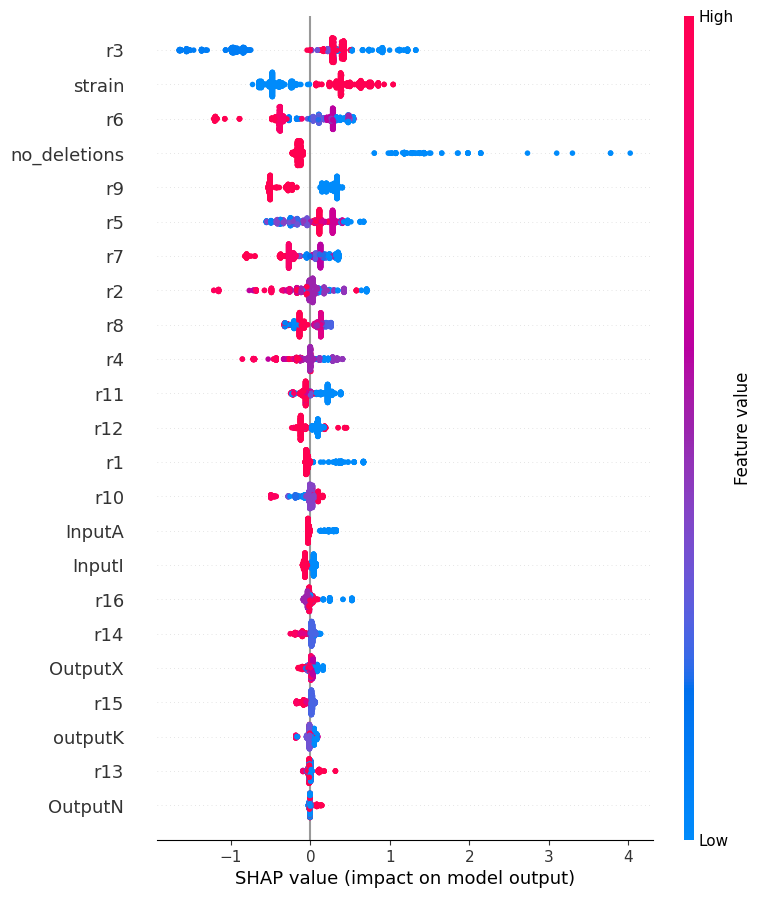

In [34]:
shap.plots.beeswarm(shap_values, max_display=X_train.shape[1])

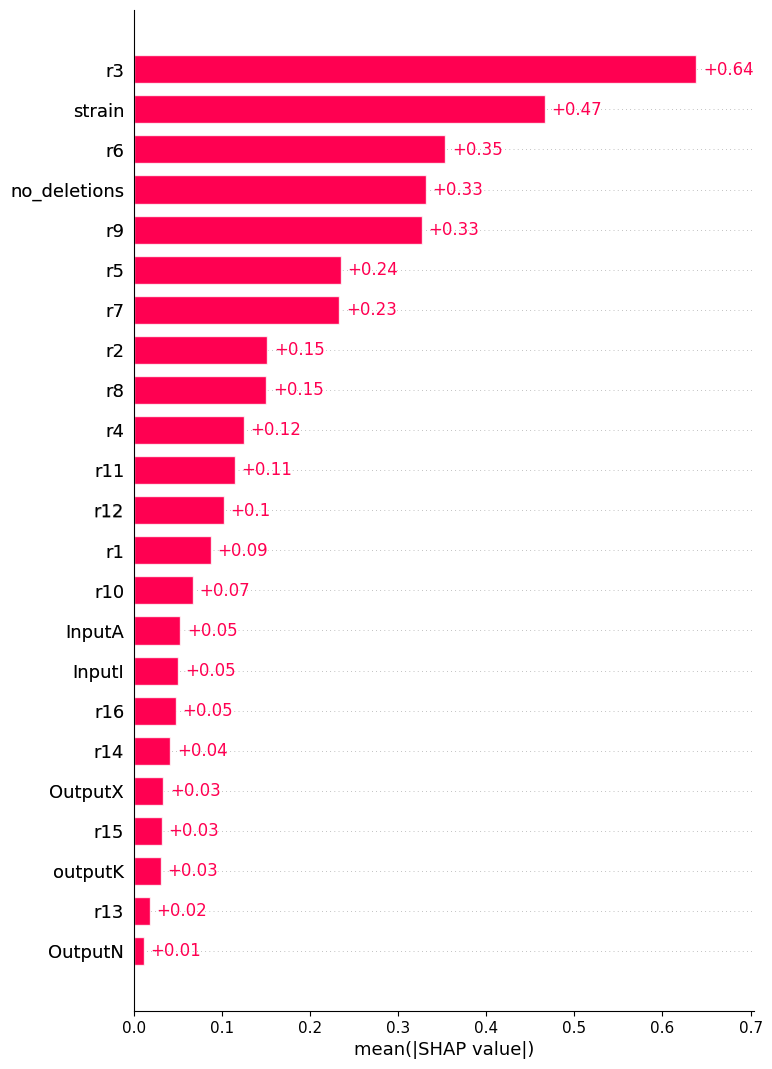

In [38]:
shap.plots.bar(shap_values, max_display=X_test.shape[1])

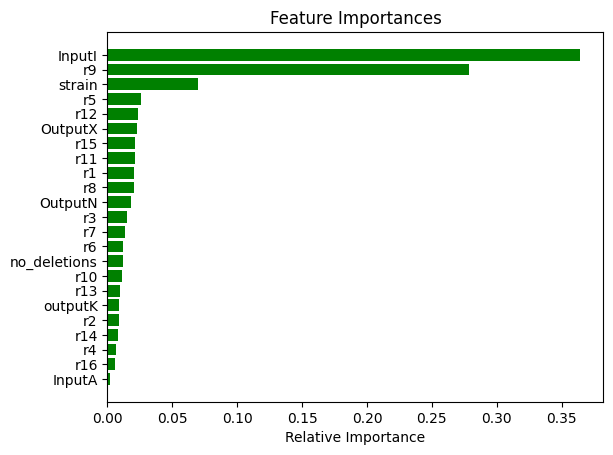

In [37]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Artificial Neural Networks

In [76]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2022-11-11 17:26:27.465344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-11 17:26:27.873447: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-11 17:26:27.873505: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-11 17:26:27.935112: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-11 17:26:28.821649: W tensorflow/stream_executor/platform/de

In [77]:
n_inputs = len(X_train.columns)

In [78]:
model = Sequential()
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=5)

Epoch 1/10


2022-11-11 17:26:46.263762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-11 17:26:46.264012: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-11 17:26:46.264034: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (comex-dell): /proc/driver/nvidia/version does not exist
2022-11-11 17:26:46.264797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


437/437 [==============================] - 1s 1ms/step - loss: 0.4665 - accuracy: 0.7689 - precision: 0.5983 - recall: 0.4732
Epoch 2/10
437/437 [==============================] - 1s 1ms/step - loss: 0.4110 - accuracy: 0.7954 - precision: 0.6346 - recall: 0.5953
Epoch 3/10
437/437 [==============================] - 1s 1ms/step - loss: 0.4072 - accuracy: 0.7986 - precision: 0.6381 - recall: 0.6104
Epoch 4/10
437/437 [==============================] - 1s 2ms/step - loss: 0.4070 - accuracy: 0.8000 - precision: 0.6435 - recall: 0.6037
Epoch 5/10
437/437 [==============================] - 1s 2ms/step - loss: 0.4016 - accuracy: 0.8014 - precision: 0.6491 - recall: 0.5970
Epoch 6/10
437/437 [==============================] - 1s 2ms/step - loss: 0.4003 - accuracy: 0.8027 - precision: 0.6483 - recall: 0.6104
Epoch 7/10
437/437 [==============================] - 1s 1ms/step - loss: 0.4013 - accuracy: 0.7986 - precision: 0.6479 - recall: 0.5786
Epoch 8/10
437/437 [==============================] 

In [79]:
validation_classification(model, X_test_scaled, y_test)

30/30 [==============================] - 0s 2ms/step
ROC-AUC = 0.8590795934287812


In [95]:
import shap


explainer = shap.DeepExplainer(model, X_train_scaled)

In [102]:
shap_values = explainer.shap_values(X_test_scaled)

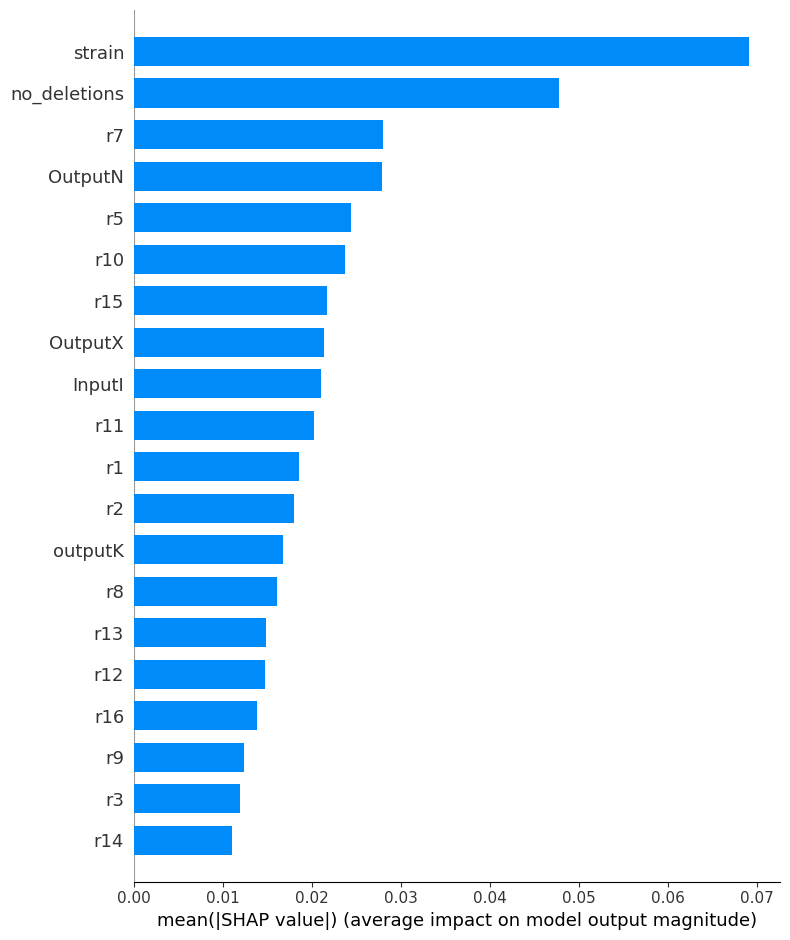

In [108]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = X_test.columns)